In [3]:
#IMPORTATION OF LIBRARIES
import pandas as pd #PANDAS = PANEL DATAS
from statsmodels.tsa.seasonal import seasonal_decompose #STATS = STATISTICS
import matplotlib.pyplot as plt #MATPLOTLIB = MATLAB-BASED LIBRARY OF MATHEMATICAL PLOTS
import seaborn as sns #IMPORT THE SEABORN LIBRARY FOR DATA VISUALIZATION

sns.set_style()

%matplotlib inline

In [4]:
data = '/content/Electric_Production.csv' #IMPORTING DATA FROM CSV FILE

df1 = pd.read_csv(data)
df1.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


# Data dictionary

In [5]:
for i in df1.columns:
  print('`', i, '`', ' -\n')

` DATE `  -

` Value `  -




`DATE` - It refers to the date on which energy production took place.

---
`Value` - It refers to the amount of energy produced at that moment.


In [6]:
# Sort variables in descending order by their missing values
(df1.isnull().sum() / df1.shape[0]).sort_values(ascending=False)

,0
DATE,0.0
Value,0.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [8]:
# prompt: Using dataframe df1: transform DATE Value columns to float

import pandas as pd
# Converting 'DATE' column to datetime type
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Converting column 'Value' to float type
df1['Value'] = pd.to_numeric(df1['Value'], errors='coerce')


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [113]:
#Set date as index
df1.set_index('DATE', inplace=True)

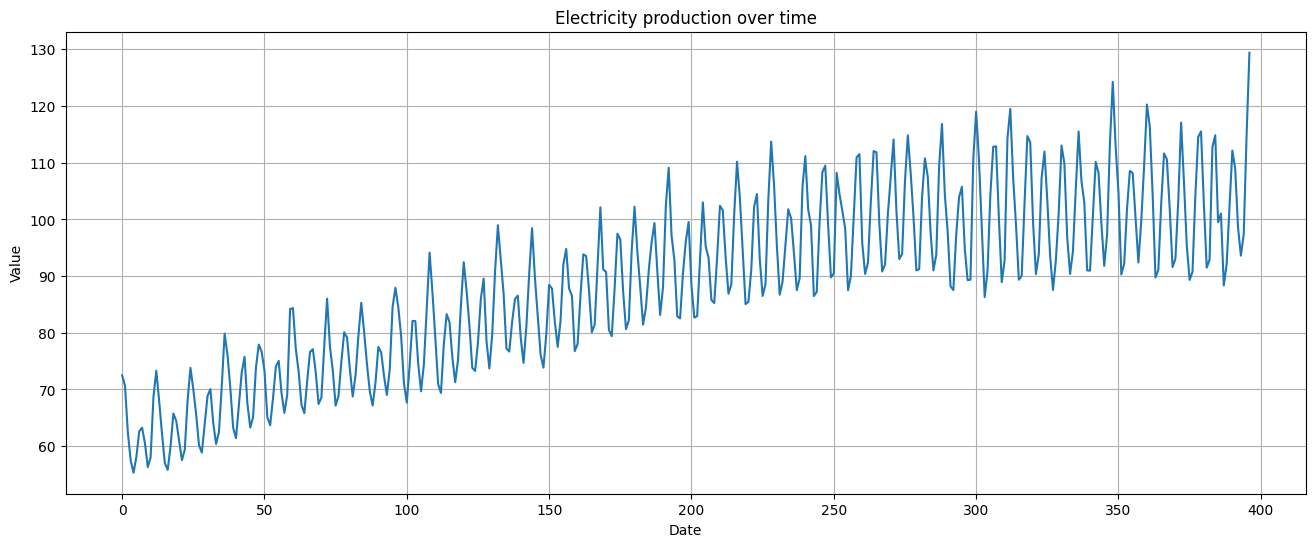

In [10]:
#Create the production graph
plt.figure(figsize=(16, 6))
plt.plot(df1['Value'])
plt.title('Electricity production over time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


# CONTEXT:

The increase in global energy demand and seasonal fluctuations mean that energy companies need to optimize production to avoid waste and maximize efficiency. This paper proposes a solution based on time series analysis to predict future electricity demand and adjust production accordingly, avoiding excess production and ensuring the supply needed to meet current demand.

**Over the past three decades, global energy production has grown significantly, driven by three main factors:**

* *Economic and Population Growth: Rapid industrialization and urbanization around the world have dramatically increased the demand for electricity.*

* *Transition to Renewable Energy: Since the 2000s, many countries have implemented policies to encourage clean energy sources, such as solar and wind, reducing dependence on fossil fuels.*

* *Technological Innovation: Advances in storage technologies and energy infrastructure have enabled greater efficiency and expansion in global production capacity.*

Purpose of Analysis:

The aim of this study is to analyze data on the growth of global electricity production, identify trends, predict future demand and optimize resource use. This analysis is essential for guiding investments, adjusting energy policies and ensuring a stable global energy supply.

# Explanation of the graph referring to electrical production
---
*   The graph below shows energy production over the years, from 1984 to the end of 2016, that is, a period of around 30 years. We can see that the increase in production is constant, with some slight moments of stabilization. This is due to the fact that the population is increasing, which impacts the consumption of electronic devices. Of course, it also needs to keep up with this high demand for devices. The graph also has some variations with peaks in energy production, which refers to the months in which the use of light and air conditioning is lower. This can also be due to the factor of weather conditions that can affect the way production is carried out.

* We can also see that in the periods from 2004 to 2012 we had a stabilization regarding energy production that can be taken as a basis for the issue of stabilization in the production of electronic equipment.

* After this stabilization, we had a significant advance in mass production, such as the greater popularization of cell phones that ended up becoming smartphones, which also influenced the increase in investments and new policies being applied in this sector, which also impacts economic issues.








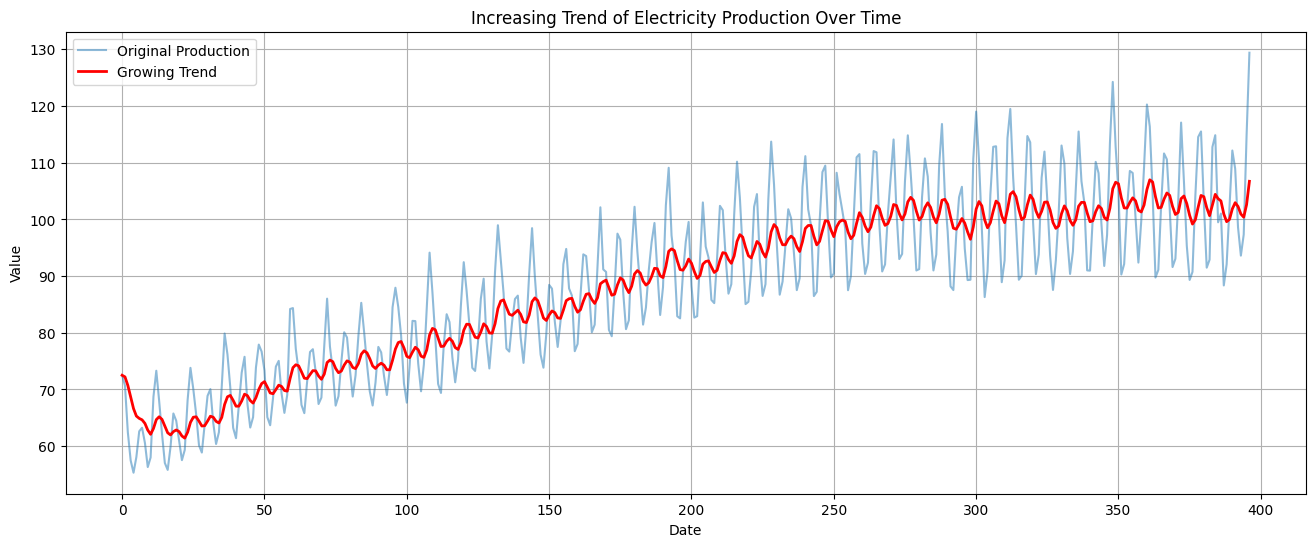

In [11]:
# Assuming df1 already has the time series data
# Calculate exponential moving average to show trend
df1['Trend'] = df1['Value'].ewm(span=12, adjust=False).mean()  # Adjust the 'span' as needed

# Create the chart with the trend line
plt.figure(figsize=(16, 6))

# Original chart
plt.plot(df1['Value'], label='Original Production', alpha=0.5)

# Graph with increasing trend
plt.plot(df1['Trend'], label='Growing Trend', color='red', linewidth=2)

plt.title('Increasing Trend of Electricity Production Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


**1. Does the time series show a trend?**
   *- Is the series rising, falling, or remaining constant over time?*

   R= The series tends to grow in the long term, but with moments of stabilization according to demand.

**2. Are there seasonal patterns in the time series?**
   *- Is there any recurring behavior in certain periods (monthly, weekly, yearly)?*

   R= Yes, the graph has a very strong and visible variation that refers to the months in which consumption is higher, so production needs to keep up with this demand to meet the need.

**3. Is the variability of the time series constant over time?**
   *- Is the behavior of the series homogeneous or does it change significantly at different intervals?*

   R= The behavior is homogeneous, referring to the advances that electronic devices undergo and also the growing demand of the population that consumes energy.

**4. Are there events or outliers in the series that need to be considered?**
   *- Are there sudden spikes or drops that deviate from expected behavior and require investigation?*

   R= At the end of the graph for the year 2016 we can notice a slightly more specific behavior compared to the growth of previous years, the graph tended to go down but for a reason there was a sudden rise, a reason that can be given to a year that saw greater advances in relation to devices and their popularization outside of the climatic conditions that suffered a greater variation in the following year.

**5. Is the time series stationary or non-stationary?**
   *- Are the series parameters (mean and variance) constant over time or do they vary? This may impact the model to be used.*

   R= It is a non-stationary series due to seasonality, there is a variation even though there is a pattern of production peaks and lower production.

# References:

https://github.com/carlosfab/escola-data-science/blob/master/notebooks/Aula_001_S%C3%A9ries_Temporais_(Time_Series)_Parte_1.ipynb